In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50

In [3]:
dataset = train_ds = tf.keras.utils.image_dataset_from_directory(
  r"C:\Users\91772\Downloads\archive (3)\PlantVillage",
  shuffle=True,
  image_size=(IMAGE_SIZE, IMAGE_SIZE),
  batch_size=BATCH_SIZE
  )

Found 2152 files belonging to 3 classes.


In [4]:
class_name=dataset.class_names

In [5]:
for image_batch , lable_batch in dataset.take(1):
    print(image_batch.shape)
    print(lable_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 2 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0]


In [6]:
len(dataset)

68

In [7]:
train_ds = dataset.take(54)


In [8]:
Test_ds = dataset.skip(54)
len(Test_ds)

14

In [9]:
val_ds = Test_ds.take(6)
len(val_ds)

6

In [10]:
test_ds= Test_ds.skip(6)
len(test_ds)

8

In [11]:
def get_dataset_partition(ds , train__split = 0.8 , val_split = 0.1,test_split = 0.1,shuffle = True , shuffle_size = 1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train__split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)  
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds  

In [12]:
train_ds , val_ds ,test_ds = get_dataset_partition(dataset)

In [13]:
len(train_ds), len(val_ds), len(test_ds)

(54, 6, 8)

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [15]:
from tensorflow.keras.models import Sequential

resize = Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])


In [16]:
from tensorflow.keras.layers import RandomFlip, RandomRotation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
])


In [20]:
from tensorflow.keras import layers, models
input_shape=(BATCH_SIZE ,IMAGE_SIZE, IMAGE_SIZE, 3)
n_class = 3   

model = models.Sequential([
    resize,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),  
    layers.Dense(64, activation='relu'),
    layers.Dense(n_class, activation='softmax'), 
])

model.build(input_shape= input_shape)


In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, verbose=1,batch_size=BATCH_SIZE)

Epoch 1/50


54/54 [==============================] - 29s 460ms/step - loss: 0.9160 - accuracy: 0.4699 - val_loss: 0.8807 - val_accuracy: 0.5000
Epoch 2/50
54/54 [==============================] - 23s 427ms/step - loss: 0.7838 - accuracy: 0.5966 - val_loss: 0.5772 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 23s 418ms/step - loss: 0.4913 - accuracy: 0.7824 - val_loss: 0.3569 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 23s 432ms/step - loss: 0.2978 - accuracy: 0.8767 - val_loss: 0.2696 - val_accuracy: 0.9010
Epoch 5/50
54/54 [==============================] - 22s 398ms/step - loss: 0.3003 - accuracy: 0.8796 - val_loss: 0.2323 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 22s 399ms/step - loss: 0.2476 - accuracy: 0.8924 - val_loss: 0.2095 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 21s 397ms/step - loss: 0.2279 - accuracy: 0.9051 - val_loss: 0.1422 - val_accuracy: 0.95

In [24]:
score = model.evaluate(test_ds, verbose=1)

8/8 [==============================] - 1s 99ms/step - loss: 0.0558 - accuracy: 0.9844


In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

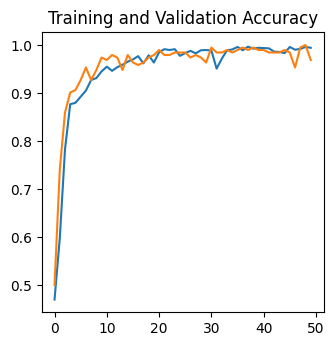

In [26]:
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
plt.plot(range (EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..224.0].


[[[154. 147. 155.]
  [154. 147. 155.]
  [152. 145. 153.]
  ...
  [170. 166. 180.]
  [164. 160. 174.]
  [156. 152. 166.]]

 [[160. 153. 161.]
  [161. 154. 162.]
  [159. 152. 160.]
  ...
  [168. 164. 178.]
  [167. 163. 177.]
  [162. 158. 172.]]

 [[161. 154. 162.]
  [165. 158. 166.]
  [165. 158. 166.]
  ...
  [161. 157. 171.]
  [164. 160. 174.]
  [164. 160. 174.]]

 ...

 [[106.  94. 104.]
  [107.  95. 105.]
  [107.  95. 105.]
  ...
  [117. 105. 117.]
  [116. 104. 116.]
  [107.  95. 107.]]

 [[116. 104. 114.]
  [118. 106. 116.]
  [118. 106. 116.]
  ...
  [122. 110. 122.]
  [124. 112. 124.]
  [118. 106. 118.]]

 [[106.  94. 104.]
  [110.  98. 108.]
  [115. 103. 113.]
  ...
  [120. 108. 120.]
  [122. 110. 122.]
  [116. 104. 116.]]]


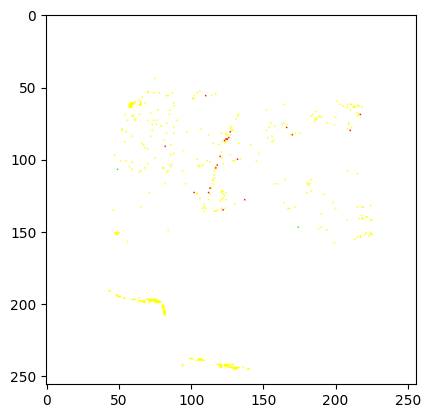

In [27]:
first = image_batch[0].numpy()
plt.imshow(first)
print(first)

First image shape
actule_lable: Potato___Late_blight
1/1 [==============================] - 0s 303ms/step
Potato___Late_blight


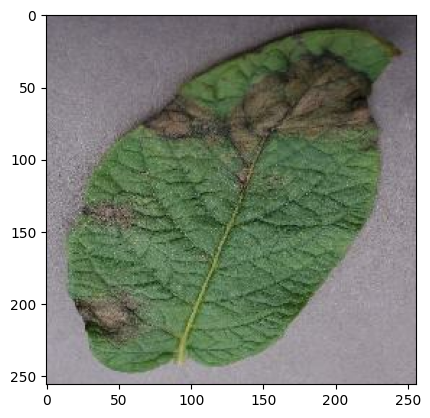

In [28]:
for image_batch , lable_batch in test_ds.take(1):
    
    first_inage = image_batch[0].numpy().astype("uint8")
    first_label = lable_batch[0].numpy()

    print("First image shape")
    plt.imshow(first_inage)
    print("actule_lable:", class_name[first_label])

    batch_prediction = model.predict(image_batch)
    print(class_name[np.argmax(batch_prediction[0])])

In [29]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


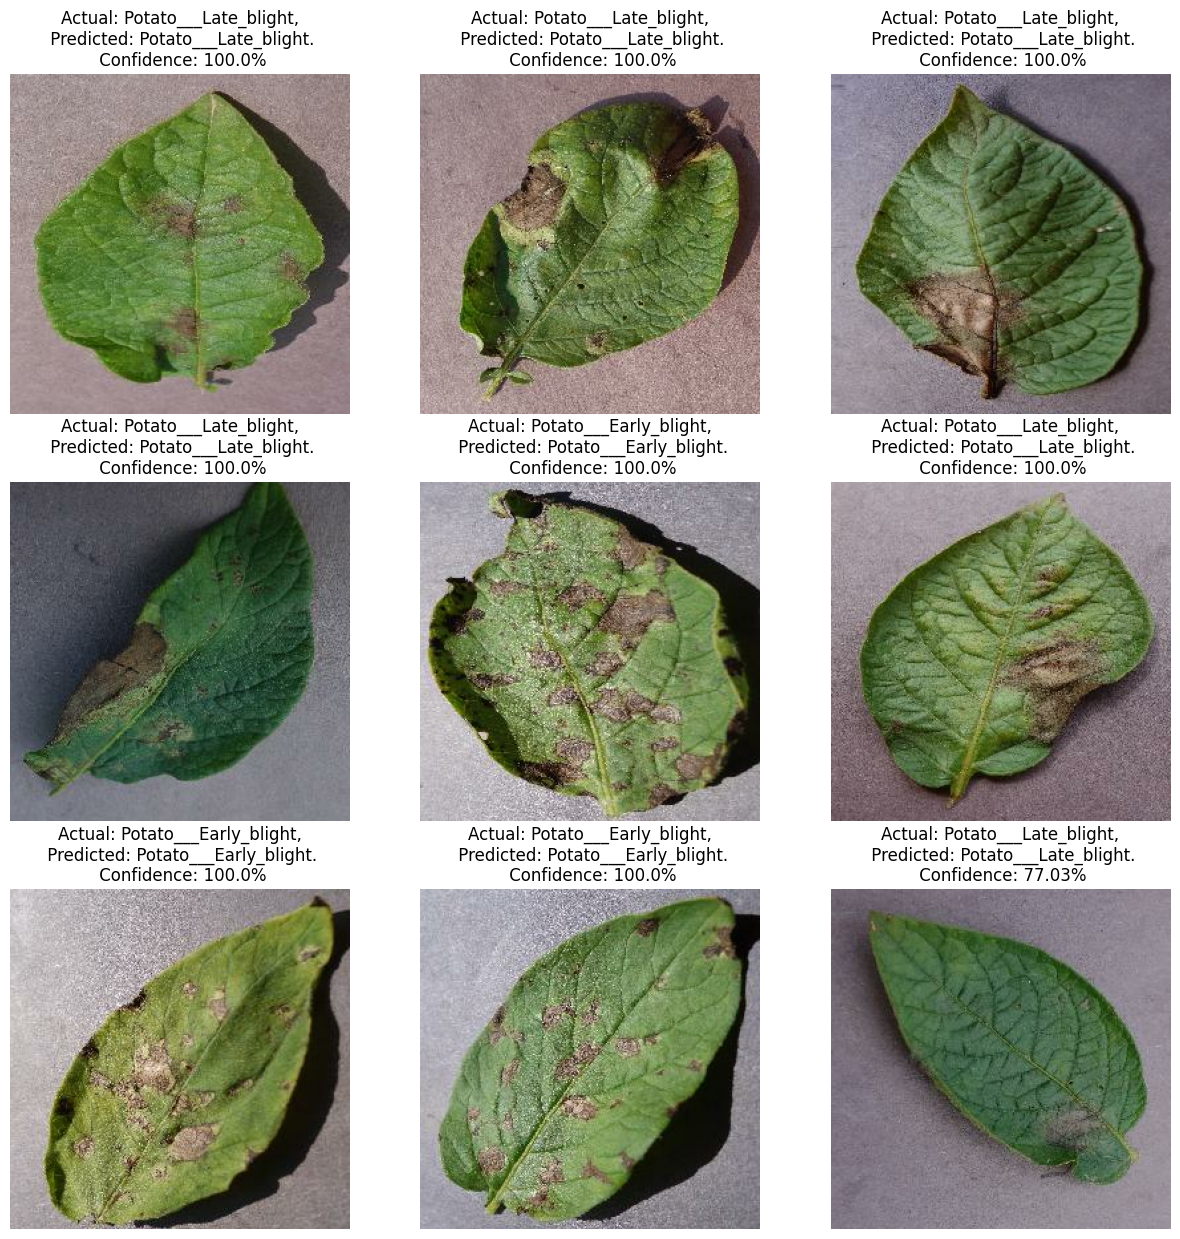

In [30]:
 
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [31]:
model_version = 3

model.save(f"potatoes_v{model_version}.h5")

c:\Users\91772\plani_pro\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
